Saving label_data1.xlsx to label_data1.xlsx
Columns in the dataset: Index(['Accel_X', 'Accel_Y', 'Yaw_rate', 'Steering_angle', 'Label'], dtype='object')
Accuracy:  100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2355
           1       1.00      1.00      1.00       143

    accuracy                           1.00      2498
   macro avg       1.00      1.00      1.00      2498
weighted avg       1.00      1.00      1.00      2498



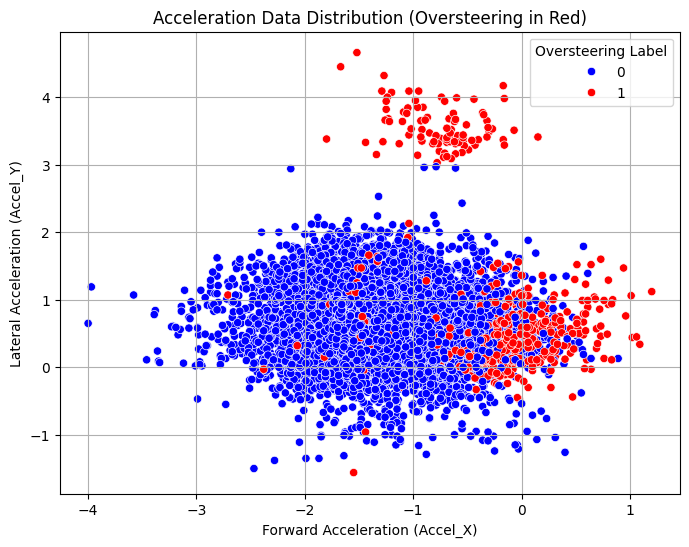

/tmp/ipython-input-2048650141.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


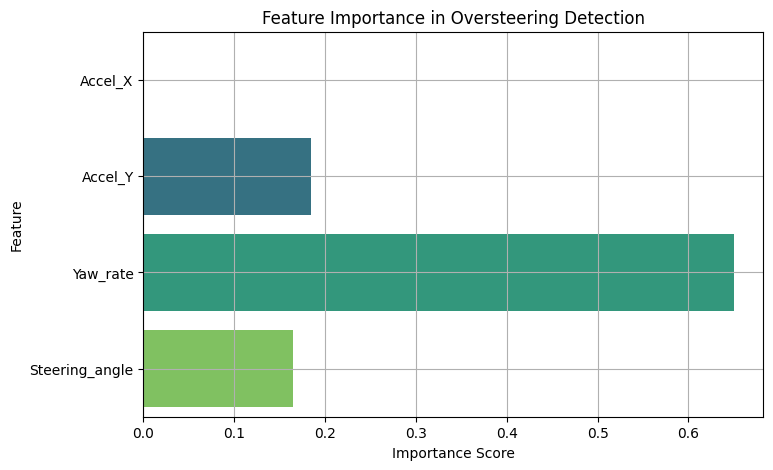

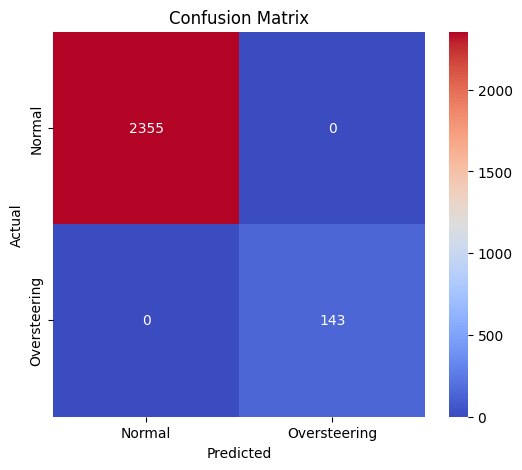

In [ ]:
# Step 1: Install required packages
!pip install pandas scikit-learn openpyxl seaborn matplotlib

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Step 3: Upload Excel file manually
from google.colab import files
uploaded = files.upload()

# Step 4: Read Excel file into pandas DataFrame
file_path = '/content/label_data1.xlsx'
df = pd.read_excel(file_path)
print("Columns in the dataset:", df.columns)

# Step 5: Rename columns for consistency
df.rename(columns={
    'forward_acceleration': 'Accel_X',
    'lateral_acceleration': 'Accel_Y',
    'yaw_rate': 'Yaw_rate',
    'steering_angle': 'Steering_angle'
}, inplace=True)

# Step 6: Convert columns to numeric
df['Accel_X'] = pd.to_numeric(df['Accel_X'], errors='coerce')
df['Accel_Y'] = pd.to_numeric(df['Accel_Y'], errors='coerce')
df['Yaw_rate'] = pd.to_numeric(df['Yaw_rate'], errors='coerce')
df['Steering_angle'] = pd.to_numeric(df['Steering_angle'], errors='coerce')

# Step 7: Label the data for oversteering detection
def label_oversteering(row, thresholds):
    """
    Function to label oversteering based on thresholds.
    """
    if (row['Accel_X'] < thresholds['forward_acceleration'][0] or
        row['Accel_X'] > thresholds['forward_acceleration'][1]):
        return 1  # Oversteering
    if (row['Accel_Y'] < thresholds['lateral_acceleration'][0] or
        row['Accel_Y'] > thresholds['lateral_acceleration'][1]):
        return 1  # Oversteering
    if (row['Yaw_rate'] < thresholds['yaw_rate'][0] or
        row['Yaw_rate'] > thresholds['yaw_rate'][1]):
        return 1  # Oversteering
    if (row['Steering_angle'] < thresholds['steering_angle'][0] or
        row['Steering_angle'] > thresholds['steering_angle'][1]):
        return 1  # Oversteering
    return 0  # Normal

# Define thresholds for oversteering detection
thresholds = {
    'forward_acceleration': [-5, 5],
    'lateral_acceleration': [-3, 3],
    'yaw_rate': [-0.5, 0.5],
    'steering_angle': [-100, 100]
}

# Apply labeling function
df['Label'] = df.apply(label_oversteering, axis=1, thresholds=thresholds)

# Step 8: Handle missing data
df.dropna(subset=['Accel_X', 'Accel_Y', 'Yaw_rate', 'Steering_angle'], inplace=True)

# Step 9: Prepare features (X) and target (y)
X = df[['Accel_X', 'Accel_Y', 'Yaw_rate', 'Steering_angle']]
y = df['Label']

# Step 10: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 11: Train a Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 12: Evaluate the model
y_pred = model.predict(X_test)

# Step 13: Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: ", accuracy, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 14: Plot Data Distribution (Accel_X vs Accel_Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Accel_X", y="Accel_Y", hue="Label", palette={0: 'blue', 1: 'red'})
plt.title("Acceleration Data Distribution (Oversteering in Red)")
plt.xlabel("Forward Acceleration (Accel_X)")
plt.ylabel("Lateral Acceleration (Accel_Y)")
plt.legend(title="Oversteering Label")
plt.grid(True)
plt.show()

# Step 15: Feature Importance Graph
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.title("Feature Importance in Oversteering Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# Step 16: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Normal", "Oversteering"], yticklabels=["Normal", "Oversteering"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 17: Interactive test function
def test_new_data():
    """
    Function to allow the user to input data for oversteering prediction.
    """
    try:
        # Getting user input for each feature
        Accel_X = float(input("Enter Accel_X (forward acceleration): "))
        Accel_Y = float(input("Enter Accel_Y (lateral acceleration): "))
        Yaw_rate = float(input("Enter Yaw_rate (yaw rate): "))
        Steering_angle = float(input("Enter Steering_angle (steering angle): "))

        # Prepare the test data for prediction
        data = pd.DataFrame([[Accel_X, Accel_Y, Yaw_rate, Steering_angle]],
                            columns=['Accel_X', 'Accel_Y', 'Yaw_rate', 'Steering_angle'])

        # Predict the label using the trained model
        prediction = model.predict(data)

        if prediction[0] == 1:
            print("Prediction: 🚨 Oversteering detected!")
        else:
            print("Prediction: ✅ Normal driving condition.")
    except ValueError:
        print("Invalid input. Please enter numeric values.")

# Step 18: Allow the user to input test data
test_new_data()  # Call the function to test user input